# **10. Kubernetes and TensorFlow Serving**

We'll deploy the clothes classification model we trained previously using Kubernetes and TensorFlow Serving

## **10.1 Overview** (video 1)

* What we'll cover this week
* Two-tier architecture

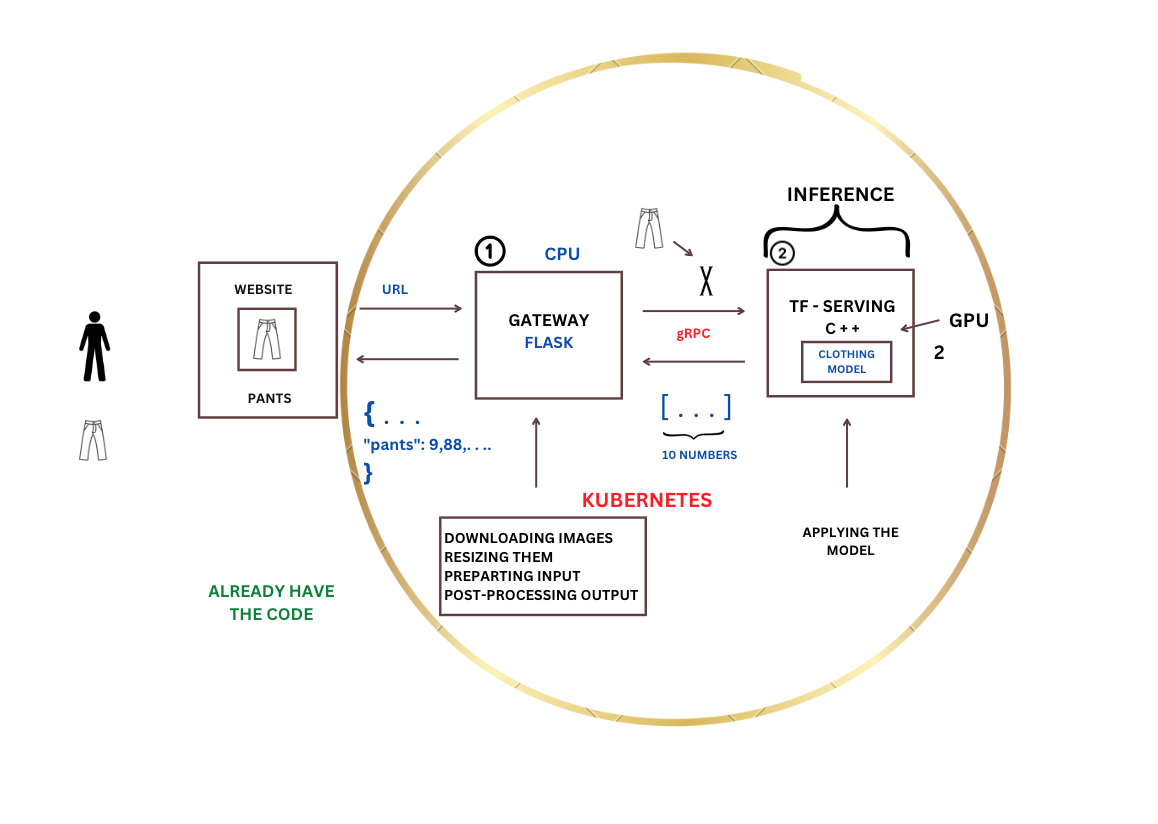


* For these images so we want to build an image classifier that classifies clothes into different categories.
* First component gateway and the second component model
* We will use TensorFlow serving for serving the model.
* We have a component this is based on TensorFlow serving which is a special tool from the TensorFlow family.
* TensorFlow family of tools that are created specifically for serving the TensorFlow model.
* We will have the model we trained clothes thing this will be serving the model that we trained.
* Written as C plus plus very efficient, it again focuses only on inference you cannot do anything else with tesorflow serving.
* Inference and tensorflow serving as a request gets the X matrix is our image that is already prepared is our image of pants.
* We download this image we turn it into numpy array, we apply the preprocessing input function to this image and we get the x and this what we send to tensoflow, 7 and the result is an array it's actually a numpy array with 10 predictions.
* These are 10 different scores for each of the classes that we have from t-shirt to events.
* Our user cannot download an image and apply the process function.
* To help our user is to have something in the front gateway, and get a URL output predictions in, let's say consumable format so it will be JSON with many different classes and then one of them will be pants with some score 8.99.
* Our website with the form for uploading these images is the place where the user will upload the picture of the pants our website can then talk to the gateway just send the URL of the pant the gateway will download we'll process it then we'll send it to TensorFlow serving.


* The uses of grpc this is a special binary protocol that is very effective it's very efficient TensorFlow serving uses it.
* For Tensorflow serving we'll apply the model we'll reply with 10 numbers and then the gateway process these numbers convert them to human readable predictions and then send back the predictions and then the website will use these predictions to suggest the category of the user for implementing the gateway we will use flask then for TensorFlow serving it uses C plus plus and we deploy everything that we created here to Kubernetes.
* We will have two components here the first component which is the gateway, then the second component which is the actual model first of all it's out of necessity because it stands for serving expects format to be prepared so something needs to prepare. Second is tensorflow serving for this service that we have we can use GPU.
* Downloading images, resizing them downloads the image it resizes this image it turns this into numpy array it applies this prepare input to numpy array varying input.
* Applying the model for that it's doing a lot of matrix multiplications.
* GPU can be run very fast but for this gateway a CPU is enough.
* For example we can have two instances of TensorFlow serving that we run on GPU.
* Gateway that we run on CPU so we can scale them independently.

## **10.2 TensorFlow Serving** (video 2)

* The saved_model format
* Running TF-Serving locally with Docker
* Invoking the model from Jupyter

name of jupyter notebook: tf-serving-connect

In [ ]:
%autosave 0

In [ ]:
!pip install grpcio==1.42.0 tensorflow-serving-api==2.7.0

In [ ]:
!pip install keras-image-helper

In [ ]:
import grpc

import tensorflow as tf

from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc

In [ ]:
host = 'localhost:8500'

channel = grpc.insecure_channel(host)

stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

In [ ]:
stub

In [ ]:
from keras_image_helper import create_preprocessor

In [ ]:
preprocessor = create_preprocessor('xception', target_size=(299, 299))

In [ ]:
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)

In [ ]:
X

In [ ]:
def np_to_protobuf(data):
    return tf.make_tensor_proto(data, shape=data.shape)

In [ ]:
pb_request = predict_pb2.PredictRequest()

pb_request.model_spec.name = 'clothing-model'
pb_request.model_spec.signature_name = 'serving_default'

pb_request.inputs['input_8'].CopyFrom(np_to_protobuf(X))

In [ ]:
np_to_protobuf(X)

In [ ]:
pb_request

```
model_spec {
  name: "clothing-model"
  signature_name: "serving_default"
}
inputs {
  key: "input_8"
  value {
    dtype: DT_FLOAT
    tensor_shape {
      dim {
        size: 1
      }
      dim {
        size: 299
      }
      dim {
        size: 299
      }
      dim {
        size: 3
      }
    }
    tensor_content: "\350\350\350\275\234\234\034\276\314\314L\276\350\350\350\275\234\234\034\276\314\314L\276\330\330\330\275\224\224\024\276\304\304D\276\270\270\270\275\204\204\004\276\264\2644\276\210\210\210\275\330\330\330\275\234\234\034\276\360\360p\275\310\310\310\275\224\224\024\276\260\2600\275\250\250\250\275\204\204\004\276\240\240\240\274\360\360p\275\330\330\330\275\300\300@\274\320\320P\275\310\310\310\275\000\201\200;\220\220\020\275\250\250\250\275\000\201\200;\220\220\020\275\250\250\250\275\000\201\200;\220\220\020\275\250\250\250\275\000\201\200;\220\220\020\275\360\360p\275\300\2600=\000\201\200;\240\240\240\274\220\210\210=\000\341\340<\000\201\200;\260\250\250=\300\2600=\300\240\240<\340\330\330=\220\210\210=\300\2600=\360\350\350=\240\230\230=\340\320P=\220\214\014>\320\310\310=\240\230\230=\000\371\370=\260\250\250=\000\361p=\220\214\014>\320\310\310=\240\230\230=\270\2644>\220\214\014>\360\350\350=\330\324T>\260\254,>\230\224\024>\330\324T>\260\254,>\230\224\024>\340\334\\>\270\2644>\240\234\034>\350\344d>\300\274<>\250\244$>\360\354l>\310\304D>\260\254,>\370\364t>\320\314L>\270\2644>\000\375|>\330\324T>\300\274<>\204\202\202>\340\334\\>\310\304D>\234\232\232>\210\206\206>\370\364t>\244\242\242>\220\216\216>\204\202\202>\250\246\246>\224\222\222>\210\206\206>\254\252\252>\230\226\226>\214\212\212>\270\266\266>\244\242\242>\230\226\226>\270\266\266>\244\242\242>\230\226\226>\300\276\276>\254\252\252>\240\236\236>\304\302\302>\260\256\256>\244\242\242>\310\306\306>\264\262\262>\250\246\246>\314\312\312>\270\266\266>\254\252\252>\334\332\332>\310\306\306>\274\272\272>\340\336\336>\314\312\312>\300\276\276>\330\326\326>\304\302\302>\270\266\266>\324\322\322>\300\276\276>\264\262\262>\330\326\326>\304\302\302>\270\266\266>\334\332\332>\310\306\306>\274\272\272>\350\346\346>\324\322\322>\310\306\306>\350\346\346>\324\322\322>\310\306\306>\364\362\362>\330\326\326>\300\276\276>\374\372\372>\340\336\336>\310\306\306>\374\372\372>\340\336\336>\310\306\306>\374\372\372>\340\336\336>\310\306\306>\202\201\001?\350\346\346>\320\316\316>\206\205\005?\360\356\356>\330\326\326>\206\205\005?
```

In [ ]:
pb_response = stub.Predict(pb_request, timeout=20.0)

In [ ]:
pb_response

In [ ]:
pb_response.outputs['dense_7'].float_val

In [ ]:
preds = pb_response.outputs['dense_7'].float_val

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, preds))

```
{'dress': -1.8682901859283447,
 'hat': -4.761244773864746,
 'longsleeve': -2.316983461380005,
 'outwear': -1.062570333480835,
 'pants': 9.88715934753418,
 'shirt': -2.8124334812164307,
 'shoes': -3.666282892227173,
 'shorts': 3.200361490249634,
 'skirt': -2.6023383140563965,
 't-shirt': -4.835045337677002}
```

## **10.3 Creating a pre-processing service** (video 3)

* Converting the notebook to a Python script
* Wrapping the script into a Flask app
* Creating the virtual env with Pipenv
* Getting rid of the TensorFlow dependency


* Turn into Flask application. I want to turn it into a python script, I'll use jupyter notebook convert to python script
* tf-serving-connect.ipynb
* We executed the script and we get the response with pants and the rest of the things.
* Now what we want to do is we want to turn this script into a flask application - predict.py
* We have a flask application that we use.
* We have our docker container with TensorFlow serving and then we have the flask application with the gateway service we send a request to the gateway prepare the request and send it to TensorFlow serving and then TensorFlow serving applies the model sends back the predictions to the gateway and gateway post processes the predictions and sends them to us.





## **10.4 Running everything locally with Docker-compose** (video 4)

* Preparing the images
* Installing docker-compose
* Running the service
* Testing the service


* First thing we will do is prepare the docker image for the TensorFlow serving service the image we used is the official image from the TensorFlow serving

**Docker compose**

**image-model.dockerfile**

```
FROM tensorflow/serving:2.7.0

COPY clothing-model /models/clothing-model/1
ENV MODEL_NAME="clothing-model"

```




* The reason when we see this is that the gateway was not able to reach our TensorFlow serving the gateway.
* Gateway is trying to communicate to TensorFlow serving. but it cannot and the reason for that say.

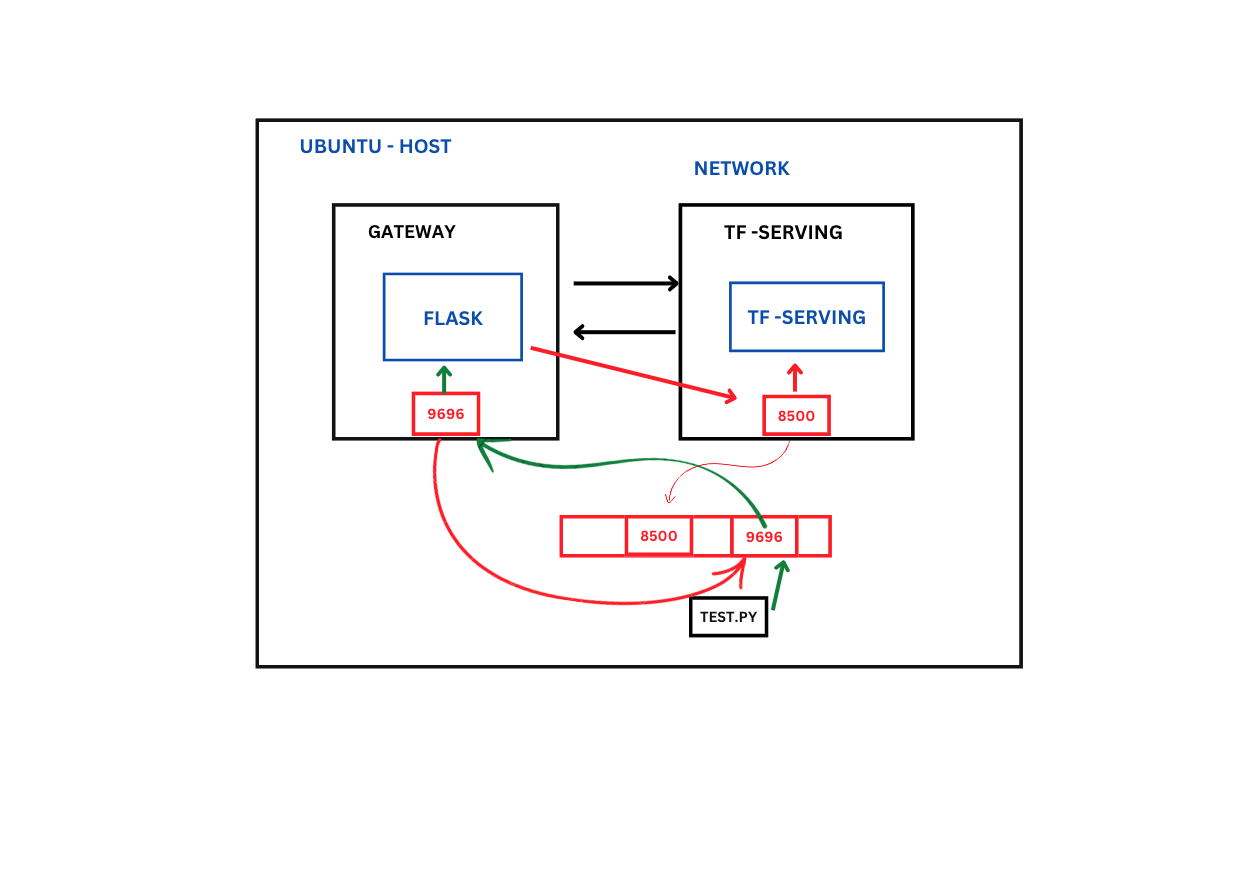

* We have two containers one is the gateway and the other container is the TensorFlow serving.
* In the gateway we have our flask application and in TensorFlow serving we have this C plus plus service for the trained model I'll call it just TF serving, TensorFlow serving uses port 8500 which we map to the post machine so let's say these are the ports of our host this is support 8500 so we map it then for flask we have port 9696 we also map it here 9696 and we map it.
* Host machine we have our test.py script, test.py sends a port request to the local host to port 9696 with this one which in turn goes to the container and then goes to flask up and then the flask up is trying to send a request to tensorflow serving.
* But inside the gateway what we configured that we want to send the request to local host 8500 and for the gateway service localhost actually means this container it tries to find a port 8500 but there is nothing right in there on the prot that's why we fail to connect so it somehow needs to find a way and to connect to the port 8500 from this port it will talk to tensorflow serving.
* It needs to go to a different container and then talk to the service that is running ther to link this two servers they need to live in the same network.
* We put it together in one network and within this network these two can talk to each other gateway will have access to ports of TensorFlow serving and the other way around.



## **10.5 Introduction to Kubernetes** (video 5)

* The anatomy of a Kubernetes cluster


* Kubernetes, also known as k8, is an open-source system for automating deployment scaling and management of containerized applications.
* To deploy docker image but it will manage them to scale up meaning it will add more instances of our application when there is an increase in load and it will remove these instances when the load decreases.
* It gives us a way to take the docker image we created locally and deployed it to the cloud and it will handle everything for us.

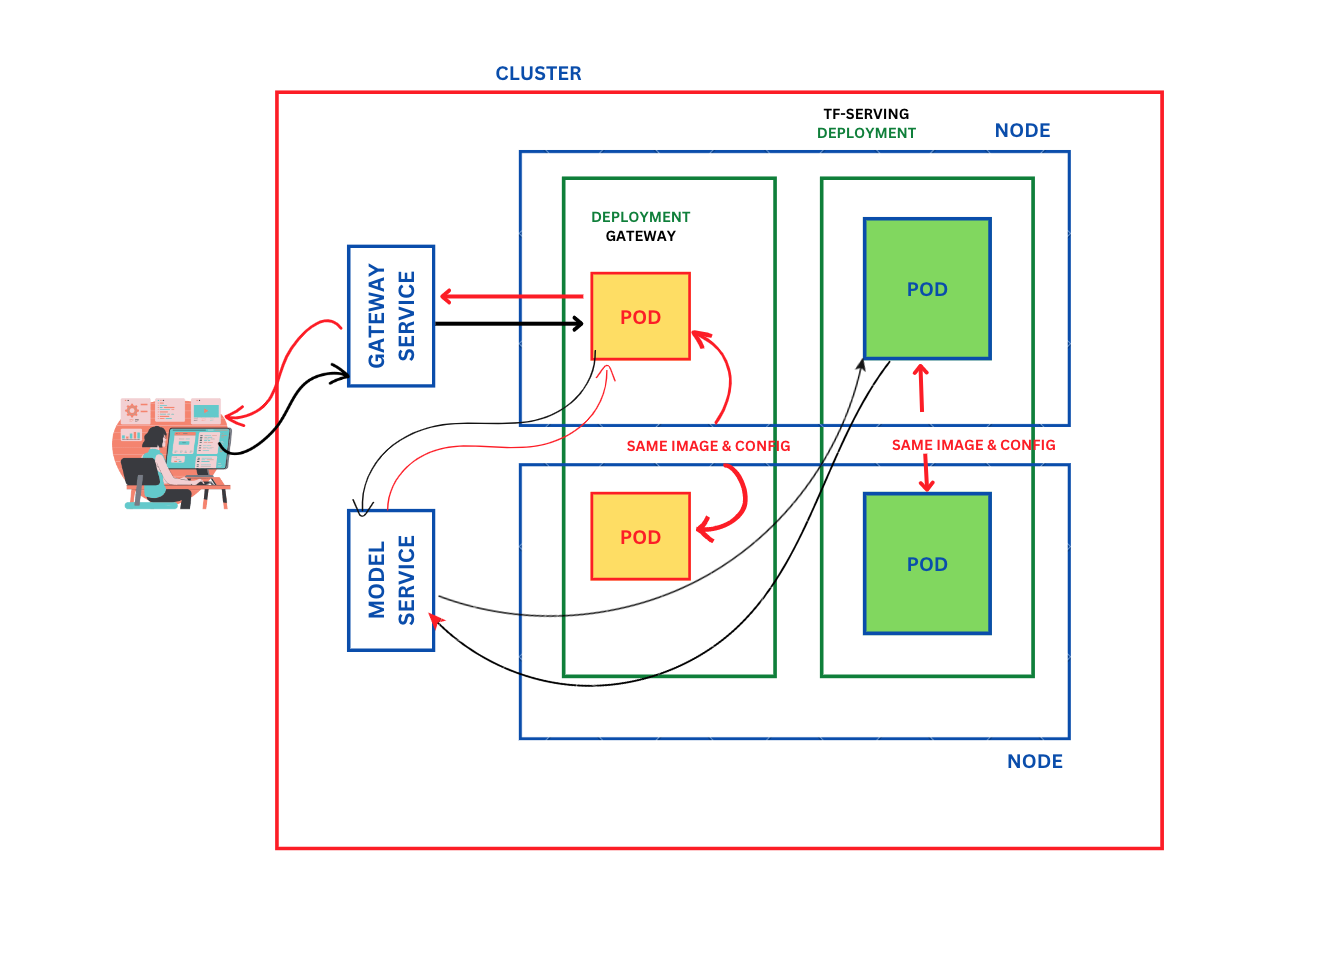

* We talk about the main concepts from Kubernetes.
* This box is our Kubernetes cluster and then inside this cluster, we have nodes that are actually like machines or services were are running.
* Nodes we have a pod and then we have another pod Kubernetes support is a container that runs a specific image with specific parameters each node can have multiple containers multiple nodes some pods maybe they take, let's say more CPU resources more ram resources another pod, and another pod the pod needs fewer CPU resources less ram doesn't need as many resources.
* We use the pod in deployments
* All the pods within one deployment have the same docker image.
* All these pods for gateway deployment have the same image.
* Zoomcamp 10 gateway 002 all have the same image the same tech of the image and have the same parameters like the same configuration here I mean the environment variable and the other deployment could be our TensorFlow serving model this is deployment for our model it needs more resources to score images.
* pods here (shaded with green color) are larger so they need more resources, pads in this deployment have the same image and same configuration.
* We have deployments which group pods that have the same image the same configuration.
* We have two services in our example first one is the gateway service and then we have our tensorflow model the service is some sort of entry point to our deployment.
* What we'll happen is that we send the request to this gateway service this will be the main point of contact for the web application like for whatever application that wants to use our gateway service it contacts this thing here and because we have multiple pods service needs to figure out where to route this request let's say it decides to route this request to this pod service is responsible for routing the request so it can send the request here or let's say it consent request here so it sends a request to any available pod and it kind of spreads the load the traffic across all the available pods in a deployment.

* Gateway deployment they don't know how to access specific pod here what does each of these pod does it then goes to the model service and then the model service routes the request to one of the pods so let's say it routes the request to this pod and then this pod gets the protobuf request it replies(red color arrow)back with predictions and then this prediction comes back all this way back and then the gateway gets the predictions from the service and then sends the reply back to the user.
* We have two types of services there are more but in this case, we can simplify it a little bit this service that the user contacts this is an external service this service has to be visible outside of the Kubernetes cluster but the model service does not need to be visible outside of the Kubernetes cluster so this service is internal it can only be used by pods in the Kubernetes cluster so it cannot be used by clients outside of the cluster.

```
NODE = SERVER/COMPUTER(EC2 INSTANCE)
POD = DOCKER CONTAINER, RUNS ON A NODE
DEPLOYMENT = GROUP OF PODS WITH THE IMAGE & CONFIG
SERVICE = THE ENTRY POINT OF AN APPLICATION, ROUTES REQUESTS TO PODS

- EXTERNAL = LOAD BALANCER
- INTERNAL = CLUSTER IP

INGRESS = THE ENTRY POINT TO THE CLUSTER
HPA = HORIZONTAL POD AUTOSCALER
```

* Node is approximately a server or like computes.
* To build your Kubernetes cluster from your old computers.
* So external in Kubernetes terms is called load balancer and internal, something like cluster IP but this is the default value.
* Ingress here is like the entry point to the cluster.
* HPA which is horizontal pod autoscaler and this is a thing that allocates more resources to the deployment.

* An external service, this service has to be visible outside of the Kubernetes cluster but the model does not need to be visible outside of the Kubernetes cluster so this service is internal it can only be used by pods in the Kubernetes cluster so it cannot be used by clients outside of the cluster.

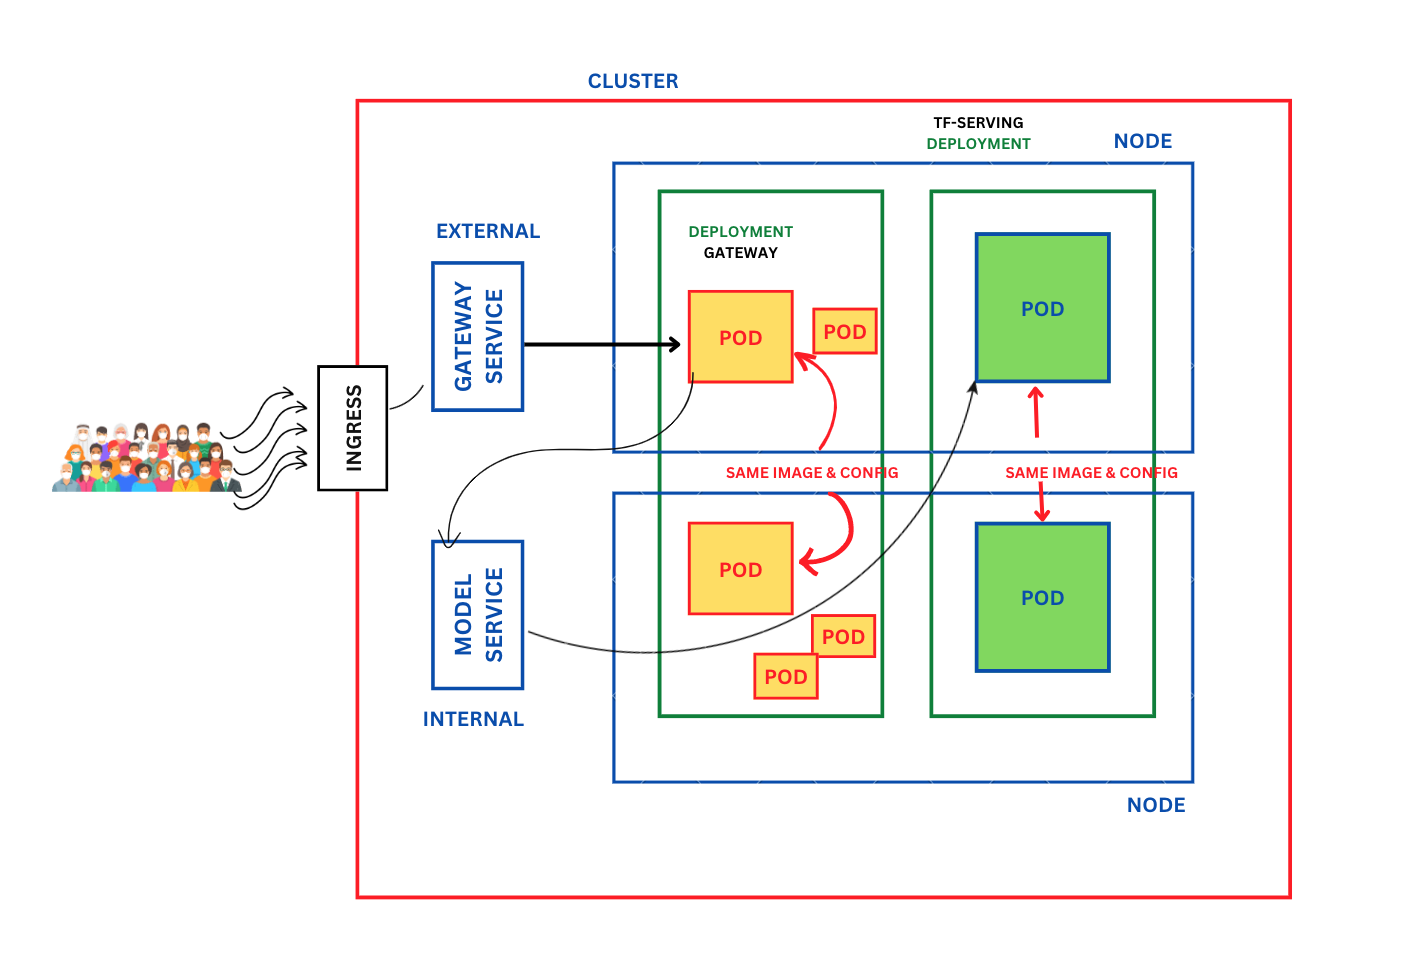

* This is what actually clients contact first and then it draws the request to one of the external services and the rest of the things happen as we discussed.
* Let's say we get a bunch of clients and all of them want to start sending a request and to be able to deal with this load what Kubernetes can do can start more positively it can start a pod here you can start a board here you can start a pod here and well can set this in configuration how many pod want to have the maximum amount of pod the minimum amount of pod and then Kubernetes if we configure it properly it will automatically scale up the deployment when the load increase and it will scale it down then the load decreases so it can cope with the load.
* That allocate more resources to the deployment if it needs them in principle what it can also do is sees let's say the nodes we have all are occupied there are too many pod running on these nodes.
* We will not deal with horizontal scalers, we will not deal with ingress.

## **10.6 Deploying a simple service to Kubernetes** (video 6)

* Create a simple ping application in Flask
* Installing kubectl
* Setting up a local Kubernetes cluster with Kind
* Creating a deployment
* Creating a service

## Create a simple ping application in Flask

* Simple ping application from session five remember you send a get request to the flask ping endpoint and it replies with ping.
* We want to deploy it with Kubernetes, create a simple ping application in the flask the rest, will set up a local Kubernetes cluster, and then we will create a deployment and a service.
* Create a ping.py


## **Installing kubectl**

Install kubectl on macOS

* [Install kubectl binary with curl on macOS](https://kubernetes.io/docs/tasks/tools/install-kubectl-macos/#install-kubectl-binary-with-curl-on-macos)

Download the latest release:
```
curl -LO "https://dl.k8s.io/release/$(curl -L -s https://dl.k8s.io/release/stable.txt)/bin/darwin/amd64/kubectl"

```


> Note:
To download a specific version, replace the `$(curl -L -s https://dl.k8s.io/release/stable.txt)` portion of the command with the specific version.

For example, to download version v1.25.0 on Intel macOS, type:

```
curl -LO "https://dl.k8s.io/release/v1.25.0/bin/darwin/amd64/kubectl"
```
And for macOS on Apple Silicon, type:

```
curl -LO "https://dl.k8s.io/release/v1.25.0/bin/darwin/arm64/kubectl"
```



## Installing or updating `kubectl` on AWS

`Kubectl` is a command line tool that you use to communicate with the Kubernetes API server. The `kubectl` binary is available in many operating system package managers. Using a package manager for your installation is often easier than a manual download and install process.

This topic helps you to download and install, or update, the `kubectl` binary on your device. The binary is identical to the [upstream community versions](https://kubernetes.io/docs/tasks/tools/#kubectl). The binary is not unique to Amazon EKS or AWS.

To install or update kubectl

1. Determine whether you already have `kubectl` installed on your device.

```
kubectl version | grep Client | cut -d : -f 5
```

If you have `kubectl` installed in the path of your device, the example output is as follows. If you want to update the version that you currently have installed with a later version, complete the next step, making sure to install the new version in the same location that your current version is in.

```
"version-number-eks-0123456", GitCommit

```
If you receive no output, then you either don't have kubectl installed, or it's not installed in a location that's in your device's path.

2. Install or update kubectl on macOS operating systems.

Download the binary for your cluster's Kubernetes version from Amazon S3.

* Kubernetes `1.24`
```
curl -o kubectl https://s3.us-west-2.amazonaws.com/amazon-eks/1.24.7/2022-10-31/bin/darwin/amd64/kubectl
```
* Kubernetes `1.23`
```
curl -o kubectl https://s3.us-west-2.amazonaws.com/amazon-eks/1.23.13/2022-10-31/bin/darwin/amd64/kubectl
```



## Setting up a local Kubernetes cluster with Kind

Other Terminal command line:for linux

  * `wget https://kind.sigs.k8s.io/dl/v0.17.0/kind-linux-amd64 -0 kind`
  * `ls`
  * `chmod +x kind`
  * `ls`
  * `cd`
  * back to location

Other Terminal command line:for mac(On macOS via Homebrew:)

  * `brew install kind`

On macOS via MacPorts:

  * `sudo port selfupdate && sudo port install kind`

Installing From Release Binaries for macOS:

```
# for Intel Macs
[ $(uname -m) = x86_64 ]&& curl -Lo ./kind https://kind.sigs.k8s.io/dl/v0.17.0/kind-darwin-amd64
# for M1 / ARM Macs
[ $(uname -m) = arm64 ] && curl -Lo ./kind https://kind.sigs.k8s.io/dl/v0.17.0/kind-darwin-arm64
chmod +x ./kind
mv ./kind /some-dir-in-your-PATH/kind

```
link:

[Quick Start - kind - Kubernetes](https://kind.sigs.k8s.io/docs/user/quick-start/)

[Installing or updating kubectl - Amazon EKS](https://docs.aws.amazon.com/eks/latest/userguide/install-kubectl.html)

[Install Tools | Kubernetes](https://kubernetes.io/docs/tasks/tools/)


## Creating a deployment


* Yaml file is like a special format mainly for configuration so for reason I want to install an extension in visual studio code for Kubernetes.
* Easier to create configuration it has some sort of templates, but you can just see what I created type in your favorite editor, so you don't have to do this but I will now install it in Kubernetes.
* So the first one from Microsoft Kubernetes Develop, deploy and debug Kubernetes application. install it.
* First create a deployment in deployment we specify how the pods in the deployment will look like and then after that, we will create a service let's start with the deployment.
* This is what a yaml file looks like for the deployment.
* This myapp is the name of the application and it's repeated four times now I need to give it a name so I'll write it ping it automatically writes ping in all these four places the first thing that we write here is this kind of deployment.
* This yaml file is about a deployment this contains a description of the deployment then all have the same name.



**deployment.yaml**

```
apiVersion: apps/v1
kind: Deployment
metadata:
  name: ping # DEPLOYMENT NAME
spec:
  selector:
    matchLabels:
      app:ping   
  template:
    metadata:
      labels:
        app: ping 
    spec:
      containers:
        name: ping   # POD NAME
        image: <Image>
        resources:
```

* We created a deployment with the name ping deployment, and this deployment will contain a pod that is called ping-pod.
* The deployment contains multiple pods so this template is for each pod because all pods within a deployment are the same they have the same image and the same configuration this is the template for the pod.

* In the template we provide the specification for each pod that has a container so the name of this container is ping pod then the image will be ping v001 this resource is how many resources we want to give to the pod.
* Some pods some applications require more resources for example our TensorFlow serving model will probably require more resources some require fewer resources.
* Let's say for this one we give 128 megabytes of ram this how much CPU we give this 500m means that we give it 0.5 CPU so we do not allow this port to use more than 50 percent CPU.
* CPU should not be more than 0.5
* Need to specify here the port on the container that we are exposing, we want others to access so in our case this port is 9696.

**deployment.yaml**

```
apiVersion: apps/v1
kind: Deployment
metadata:
  name: ping-deployment
spec:
  selector:
    matchLabels:
      app:ping   # ALL PODS WITH APP="PING" BELONG TO THIS DEPLOYMENT
  template:
    metadata:
      labels:
        app: ping # EACH POD GETS LABEL APP ="PING"
    spec:
      containers:
        name: ping-pod
        image: ping:v001
        resources:
```

* Will get a label up and the value for this label is ping so each port will get this label.
* This thing here means that all pod that has a label up that is equal to ping belong to this deployment.
* Why do we need this to me it's kind of clear that if we specify a pod within this deployment of clear that they are linked they should be linked but in Kubernetes, we need to explicitly link them.

* We specify replicas as how many pods we want to create so for this deployment, we want to create one replica and it will know it will use this selector to see how many pods are there in this deployment.
* If we later add his and increase this to 10 what will happen is it will be okay if there is one let's add nine more.
* Run now with one replica
* We need to apply to our Kubernetes.
* We use kubectl we do apply minus -f, minus f means read if from a file. and the file is called deployment.yaml

  

* We have port forwarding so we have a Kubernetes cluster and in this cluster, we have a port ping and then it lives in this deployment and then we have our laptop so what we have on our laptop is we have our kubectl, we have a port 9696.
* Using kubectl we can connect this port from this port to a port on our computer, let's say we connect it to port 9696 here as well and then we can access this port by using localhost this is called port forwarding and we can use kubectl for doing this.  
* kubectl port-forward ping-deployment .76 is the name of the pod and then I need to specify the board on my laptop on my host machine and then the port on the port now is forwarding my port on the host machine to the port on the deployment.



* Create **service.yaml**

```
 metadata:
   name:ping    - NAME OF  SERVICE

and the

 selector:
   app:ping    - WHICH PODS QUALIFY FOR FORWARDING REQUESTS

```
* Selector is useful to understand to which spots it needs to forward the requests, so it needs to know when it gets a request which of the pods can receive it and it looks at the selector the app tag and it looks for those pods that have up text set to ping.

 ``` 
 ports:

  port:<port>

  target port:9696
```

* Let's start with the target port this is the port on port 9696.
* Port that the container exposes so this is the target port and then this port is the port in the service.


**deployment.yaml**

* Remember we specified it here so this is the container port 9696.

```
 port:
   port:80
   target port:9696
```
* Let's say in the service can be the port 80, the port 80 is like the default HTTP port will get a request it will listen for the requests on port 80 and all the requests it will get will route to one of the pods to port 9696.

* So we will have a service, this service will have a  port 80 and it will forward all the requests to this port 9696 and we as users will communicate with this service so we will send our request to this port service and then the service will decide to which port to forward the request.
* kubectl gets svc this is the same as the service just shorter.
* We have two services ping and the other service is Kubernetes and then type for the ping services cluster, the two types of services are external services and internal service cluster IP is an internal service and external service is the load balancer.
* we use kind a of local Kubernetes cluster.




## **10.7 Deploying TensorFlow models to Kubernetes** (video 7)

* Deploying the TF-Serving model
* Deploying the Gateway
* Testing the service

* cluster we have this ping pod from the ping deployment and then we can also see what are the deployments.
* Let's deploy our TensorFlow server model.
* Docker-compose.yaml we run both the model and the gateway and essentially what we want to do now is replicate that so we want to deploy the clothing model using this image and want to deploy a gateway using this image and provide also this configuration but this time we want to deploy this to Kubernetes.


* Create new folder kube-config
* kube-config folder, we will create the yaml files for configuring the deployments and the services let's start with creating a deployment for the model.
* Call it model deployment yaml, use a template from the Kubernetes plugin.
* This is the name of the image is zoomcamp-10-model: xception-v4-001 then for resources it gives one CPU and maybe 256 megabytes of memory. and we need to specify how many ports we want to have in the deployment.



## **10.8 Deploying to EKS** (video 8)

* Creating an EKS cluster on AWS
* Publishing the image to ECR


* [eksctl](https://eksctl.io/) is a simple CLI tool for creating and managing clusters on EKS - Amazon's managed Kubernetes service for EC2. It is written in Go, uses CloudFormation, was created by Weaveworks and it welcomes contributions from the community.

### **Installing or updating eksctl**

To install or update eksctl

1. Determine whether you already have eksctl installed on your device.

```
eksctl version
```
If you have eksctl installed in the path of your device, the example output is as follows. If you want to update the version that you currently have installed with a later version, complete the next step, making sure to install the new version in the same location that your current version is in.

```
0.120.0
```
If you receive no output, then you either don't have eksctl installed, or it's not installed in a location that's in your device's path.

2. You can install `eksctl` on `macOS`, Linux, or Windows

**To install or update `eksctl` on `macOS`**

The easiest way to get started with Amazon EKS and macOS is by installing `eksctl` with Homebrew, an open-source tool that can be installed using [these instructions](https://brew.sh/). The `eksctl` Homebrew recipe installs `eksctl` and any other dependencies that are required for Amazon EKS, such as `kubectl`. The recipe also installs the [aws-iam-authenticator](https://docs.aws.amazon.com/eks/latest/userguide/install-aws-iam-authenticator.html), which is required if you don't have the AWS CLI version `1.16.156` or higher installed.

a. If you do not already have Homebrew installed on macOS, install it with the following command.

```
/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install.sh)"

```
b. Install the Weaveworks Homebrew tap.
```
brew tap weaveworks/tap

```
c. Install or upgrade `eksctl`.

* Install `eksctl` with the following command:
```
brew install weaveworks/tap/eksctl
```
* If `eksctl` is already installed, run the following command to upgrade:

```
brew upgrade eksctl && brew link --overwrite eksctl
```

d. Test that your installation was successful with the following command.
```
eksctl version
```


To install or update `eksctl` on `Linux`

a. Download and extract the latest release of eksctl with the following command.
```
curl --silent --location "https://github.com/weaveworks/eksctl/releases/latest/download/eksctl_$(uname -s)_amd64.tar.gz" | tar xz -C /tmp
```
b. Move the extracted binary to `/usr/local/bin`.

```
sudo mv /tmp/eksctl /usr/local/bin
```
c. Test that your installation was successful with the following command.
```
eksctl version
```

## **10.9 Summary**

* TF-Serving is a system for deploying TensorFlow models
* When using TF-Serving, we need a component for pre-processing
* Kubernetes is a container orchestration platform
* To deploy something on Kubernetes, we need to specify a deployment and a service
* You can use Docker compose and Kind for local experiments


## **10.10 Explore more**

* Other local Kuberneteses: minikube, k3d, k3s, microk8s, EKS Anywhere
* [Rancher desktop](https://rancherdesktop.io/)
* Docker Desktop
* [Lens](https://k8slens.dev/)
* Many cloud providers have Kubernetes: GCP, Azure, Digital Ocean, and others. Look for "Managed Kubernetes" in your favorite search engine
* Deploy the model from previous modules and from your project with Kubernetes
* Learn about Kubernetes namespaces. Here we used the default namespace